In [ ]:
#Name: Srinitish Srinivasan
#Register No: 21BAI1394

In [1]:
from tensorflow import keras
import tensorflow as tf
import os,datetime
import tensorflow_datasets as tfds

df, info = tfds.load('patch_camelyon', with_info = True, as_supervised = True)

#Getting the train, validation and test data
train_data = df['train']
valid_data = df['validation']
test_data = df['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteJAF0UD/patch_camelyon-test.tfrecord*...:   …

Generating train examples...:   0%|          | 0/262144 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteJAF0UD/patch_camelyon-train.tfrecord*...:  …

Generating validation examples...:   0%|          | 0/32768 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteJAF0UD/patch_camelyon-validation.tfrecord*.…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [2]:
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, labels

train_data = train_data.map(preprocess)
valid_data = valid_data.map(preprocess)
test_data = test_data.map(preprocess)

buffer_size = 1000
train_data = train_data.shuffle(buffer_size)

batch_size = 128
train_data = train_data.batch(batch_size).prefetch(1)
valid_data = valid_data.batch(batch_size).prefetch(1)
test_data = test_data.batch(batch_size).prefetch(1)

In [3]:
#Seperating image and label into different variables
train_images, train_labels = next(iter(train_data))
valid_images, valid_labels = next(iter(valid_data))
test_images, test_labels  = next(iter(test_data))

#Checking the label shape
valid_labels.shape

#Checking the image shape
train_images.shape

TensorShape([128, 96, 96, 3])

In [4]:
#import the necessary libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

model = Sequential([
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform', activation='relu', input_shape = [96, 96, 3]),
                    MaxPooling2D(2),
                    Conv2D(256, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(512, 3,padding='same',kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Conv2D(1024, 3,padding='same', kernel_initializer='he_uniform',activation='relu',),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(1028,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(512,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(1, activation = 'sigmoid'),
                    ])

In [5]:
model.compile(optimizer= optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

history = model.fit( train_images, train_labels, epochs = 100, validation_data = (valid_images, valid_labels), verbose=2)


Epoch 1/100
4/4 - 13s - loss: 1.6217 - acc: 0.5703 - val_loss: 0.8102 - val_acc: 0.5859 - 13s/epoch - 3s/step
Epoch 2/100
4/4 - 0s - loss: 0.9407 - acc: 0.4062 - val_loss: 0.6649 - val_acc: 0.5859 - 476ms/epoch - 119ms/step
Epoch 3/100
4/4 - 0s - loss: 0.6993 - acc: 0.4922 - val_loss: 0.6926 - val_acc: 0.5859 - 486ms/epoch - 122ms/step
Epoch 4/100
4/4 - 0s - loss: 0.7536 - acc: 0.4766 - val_loss: 0.6763 - val_acc: 0.5547 - 474ms/epoch - 118ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6709 - acc: 0.5859 - val_loss: 0.7229 - val_acc: 0.4141 - 483ms/epoch - 121ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6532 - acc: 0.6016 - val_loss: 0.6653 - val_acc: 0.5859 - 483ms/epoch - 121ms/step
Epoch 7/100
4/4 - 0s - loss: 0.7134 - acc: 0.5156 - val_loss: 0.8276 - val_acc: 0.4141 - 481ms/epoch - 120ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6170 - acc: 0.6328 - val_loss: 0.6429 - val_acc: 0.5859 - 482ms/epoch - 120ms/step
Epoch 9/100
4/4 - 0s - loss: 0.6314 - acc: 0.6406 - val_loss: 0.7671 - val_acc: 0.4141 - 482

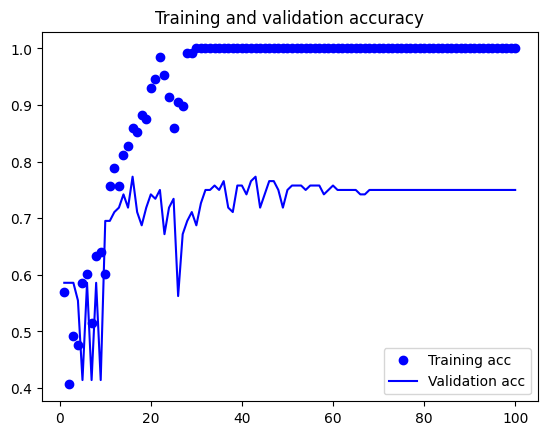

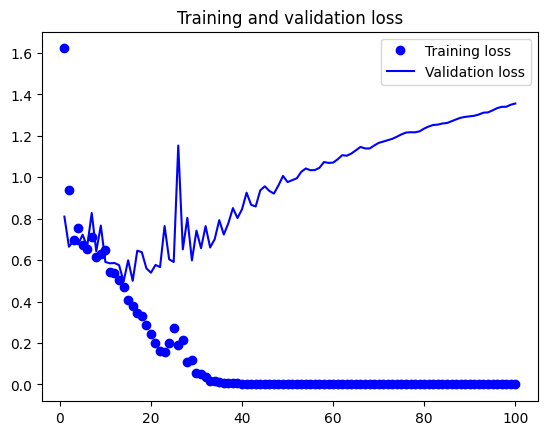

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()